In [47]:
import pandas as pd
import numpy as np

import matplotlib
%matplotlib inline
matplotlib.style.use('ggplot')

In [4]:
# https://github.com/fivethirtyeight/data/tree/master/thanksgiving-2015
data = pd.read_csv('data/thanksgiving-2015-poll-data.csv', encoding="Latin-1")
data.head()

,RespondentID,Do you celebrate Thanksgiving?,What is typically the main dish at your Thanksgiving dinner?,What is typically the main dish at your Thanksgiving dinner? - Other (please specify),How is the main dish typically cooked?,How is the main dish typically cooked? - Other (please specify),What kind of stuffing/dressing do you typically have?,What kind of stuffing/dressing do you typically have? - Other (please specify),What type of cranberry saucedo you typically have?,What type of cranberry saucedo you typically have? - Other (please specify),...,Have you ever tried to meet up with hometown friends on Thanksgiving night?,"Have you ever attended a ""Friendsgiving?""",Will you shop any Black Friday sales on Thanksgiving Day?,Do you work in retail?,Will you employer make you work on Black Friday?,How would you describe where you live?,Age,What is your gender?,How much total combined money did all members of your HOUSEHOLD earn last year?,US Region
0,4337954960,Yes,Turkey,NaN,Baked,NaN,Bread-based,NaN,None,NaN,...,Yes,No,No,No,NaN,Suburban,18 - 29,Male,"$75,000 to $99,999",Middle Atlantic
1,4337951949,Yes,Turkey,NaN,Baked,NaN,Bread-based,NaN,Other (please specify),Homemade cranberry gelatin ring,...,No,No,Yes,No,NaN,Rural,18 - 29,Female,"$50,000 to $74,999",East South Central
2,4337935621,Yes,Turkey,NaN,Roasted,NaN,Rice-based,NaN,Homemade,NaN,...,Yes,Yes,Yes,No,NaN,Suburban,18 - 29,Male,"$0 to $9,999",Mountain
3,4337933040,Yes,Turkey,NaN,Baked,NaN,Bread-based,NaN,Homemade,NaN,...,Yes,No,No,No,NaN,Urban,30 - 44,Male,"$200,000 and up",Pacific
4,4337931983,Yes,Tofurkey,NaN,Baked,NaN,Bread-based,NaN,Canned,NaN,...,Yes,No,No,No,NaN,Urban,30 - 44,Male,"$100,000 to $124,999",Pacific


In [6]:
data['Do you celebrate Thanksgiving?'].unique()

array(['Yes', 'No'], dtype=object)

In [7]:
data['Do you celebrate Thanksgiving?'].value_counts()

Yes    980
No      78
Name: Do you celebrate Thanksgiving?, dtype: int64

In [10]:
data.columns

Index(['RespondentID', 'Do you celebrate Thanksgiving?',
       'What is typically the main dish at your Thanksgiving dinner?',
       'What is typically the main dish at your Thanksgiving dinner? - Other (please specify)',
       'How is the main dish typically cooked?',
       'How is the main dish typically cooked? - Other (please specify)',
       'What kind of stuffing/dressing do you typically have?',
       'What kind of stuffing/dressing do you typically have? - Other (please specify)',
       'What type of cranberry saucedo you typically have?',
       'What type of cranberry saucedo you typically have? - Other (please specify)',
       'Do you typically have gravy?',
       'Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Brussel sprouts',
       'Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Carrots',
       'Which of these side dishes aretypically served

In [13]:
data['What is your gender?'].value_counts(dropna=False)

Female    544
Male      481
NaN        33
Name: What is your gender?, dtype: int64

In [57]:
data['What is your gender?'][-1:].isnull()
# returns series

1057    True
Name: What is your gender?, dtype: bool

In [60]:
math.isnan(data['What is your gender?'][-1:])
# returns bool

True

In [40]:
type(data['What is your gender?'])

pandas.core.series.Series

In [35]:
import math

def gender_code(gender_string):
    if isinstance(gender_string, float) and math.isnan(gender_string):
        return gender_string
    return int(gender_string == 'Female')

In [37]:
data['gender'] = data['What is your gender?'].apply(gender_code)
data["gender"].value_counts(dropna=False)

 1.0    544
 0.0    481
NaN      33
Name: gender, dtype: int64

We can use the apply method on DataFrames as well as Series. When we use the pandas.DataFrame.apply method, an entire row or column will be passed into the function we specify. By default, apply will work across each column in the DataFrame. If we pass the axis=1 keyword argument, it will work across each row.

In [43]:
data.apply(lambda x: x.dtype).head()

RespondentID                                                                             object
Do you celebrate Thanksgiving?                                                           object
What is typically the main dish at your Thanksgiving dinner?                             object
What is typically the main dish at your Thanksgiving dinner? - Other (please specify)    object
How is the main dish typically cooked?                                                   object
dtype: object

In [46]:
data['How much total combined money did all members of your HOUSEHOLD earn last year?'].value_counts(dropna=False)

$25,000 to $49,999      180
Prefer not to answer    136
$50,000 to $74,999      135
$75,000 to $99,999      133
$100,000 to $124,999    111
$200,000 and up          80
$10,000 to $24,999       68
$0 to $9,999             66
$125,000 to $149,999     49
$150,000 to $174,999     40
NaN                      33
$175,000 to $199,999     27
Name: How much total combined money did all members of your HOUSEHOLD earn last year?, dtype: int64

In [67]:
def clean_income(value):
    if value == '$200,000 and up':
        return 200000
    if value == 'Prefer not to answer' or (isinstance(value, float) and math.isnan(value)):
        return np.nan
    value = value.replace(',', '').replace('$','')
    high, low = map(int, value.split(' to '))
    return (high + low) / 2

In [69]:
print(clean_income('$150,000 to $174,999'))
print(clean_income('Prefer not to answer'))

162499.5
nan


In [71]:
data['income'] = data['How much total combined money did all members of your HOUSEHOLD earn last year?'].apply(clean_income)

In [72]:
data['income'].value_counts(dropna=False)

 37499.5     180
NaN          169
 62499.5     135
 87499.5     133
 112499.5    111
 200000.0     80
 17499.5      68
 4999.5       66
 137499.5     49
 162499.5     40
 187499.5     27
Name: income, dtype: int64

In [73]:
data["What type of cranberry saucedo you typically have?"].value_counts()

Canned                    502
Homemade                  301
None                      146
Other (please specify)     25
Name: What type of cranberry saucedo you typically have?, dtype: int64

In [74]:
homemade = data[data['What type of cranberry saucedo you typically have?'] == 'Homemade']
canned = data[data['What type of cranberry saucedo you typically have?'] == 'Canned']

In [75]:
print(homemade['income'].mean())
print(canned['income'].mean())

94878.1072874494
83823.40340909091


In [76]:
cranberry_group = data.groupby('What type of cranberry saucedo you typically have?')

In [78]:
cranberry_group.size()

What type of cranberry saucedo you typically have?
Canned                    502
Homemade                  301
None                      146
Other (please specify)     25
dtype: int64

In [79]:
data['What type of cranberry saucedo you typically have?'].value_counts()

Canned                    502
Homemade                  301
None                      146
Other (please specify)     25
Name: What type of cranberry saucedo you typically have?, dtype: int64

In [82]:
for name, group in cranberry_group:
    print(name)
    print(group.shape)
    print(type(group))

Canned
(502, 67)
<class 'pandas.core.frame.DataFrame'>
Homemade
(301, 67)
<class 'pandas.core.frame.DataFrame'>
None
(146, 67)
<class 'pandas.core.frame.DataFrame'>
Other (please specify)
(25, 67)
<class 'pandas.core.frame.DataFrame'>


In [86]:
cranberry_group['income']

In [85]:
cranberry_group['income'].size()

What type of cranberry saucedo you typically have?
Canned                    502
Homemade                  301
None                      146
Other (please specify)     25
dtype: int64

In [92]:
cranberry_group['income'].agg(np.mean)

What type of cranberry saucedo you typically have?
Canned                    83823.403409
Homemade                  94878.107287
None                      78886.084034
Other (please specify)    86629.978261
Name: income, dtype: float64

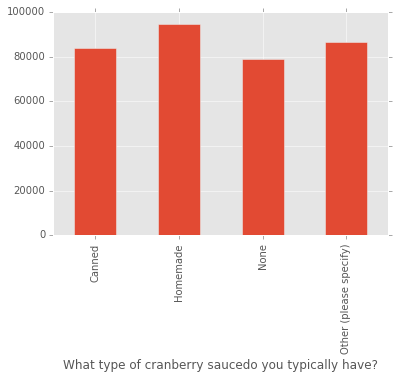

In [93]:
cranberry_group['income'].agg(np.mean).plot(kind='bar')

In [94]:
grouped = data.groupby(["What type of cranberry saucedo you typically have?", "What is typically the main dish at your Thanksgiving dinner?"])
grouped.agg(np.mean)

RespondentID  \
What type of cranberry saucedo you typically have? What is typically the main dish at your Thanksg...                 
Canned                                             Chicken                                               4336354418   
                                                   Ham/Pork                                              4336757434   
                                                   I don't know                                          4335987430   
                                                   Other (please specify)                                4336682072   
                                                   Roast beef                                            4336254414   
                                                   Tofurkey                                              4337156546   
                                                   Turkey                                                4336705225   
Homemade                                           Chicken                                               4336539693   
                                                   Ham/Pork                                              4337252861   
                                                   I don't know                                          4336083561   
                                                   Other (please specify)                                4336863306   
                                                   Roast beef                                            4336173790   
                                                   Tofurkey                                              4336789676   
                                                   Turducken                                             4337475308   
                                                   Turkey                                                4336790802   
None                                               Chicken                                               4336150656   
                                                   Ham/Pork                                              4336679896   
                                                   I don't know                                          4336412261   
                                                   Other (please specify)                                4336687790   
                                                   Roast beef                                            4337423740   
                                                   Tofurkey                                              4336950068   
                                                   Turducken                                             4336738591   
                                                   Turkey                                                4336784218   
Other (please specify)                             Ham/Pork                                              4336465104   
                                                   Other (please specify)                                4337335395   
                                                   Tofurkey                                              4336121663   
                                                   Turkey                                                4336724418   

                                                                                                         gender  \
What type of cranberry saucedo you typically have? What is typically the main dish at your Thanksg...             
Canned                                             Chicken                                             0.333333   
                                                   Ham/Pork                                            0.642857   
                                                   I don't know                                        0.000000   
                                                   Other (please specify)   

In [96]:
grouped["income"].agg([np.mean, np.sum, np.std]).head(10)

mean  \
What type of cranberry saucedo you typically have? What is typically the main dish at your Thanksg...                  
Canned                                             Chicken                                              80999.600000   
                                                   Ham/Pork                                             77499.535714   
                                                   I don't know                                          4999.500000   
                                                   Other (please specify)                               53213.785714   
                                                   Roast beef                                           25499.500000   
                                                   Tofurkey                                            100713.857143   
                                                   Turkey                                               85242.682045   
Homemade                                           Chicken                                              19999.500000   
                                                   Ham/Pork                                             96874.625000   
                                                   I don't know                                                  NaN   

                                                                                                              sum  \
What type of cranberry saucedo you typically have? What is typically the main dish at your Thanksg...               
Canned                                             Chicken                                               404998.0   
                                                   Ham/Pork                                             1084993.5   
                                                   I don't know                                            4999.5   
                                                   Other (please specify)                                372496.5   
                                                   Roast beef                                            127497.5   
                                                   Tofurkey                                              704997.0   
                                                   Turkey                                              34182315.5   
Homemade                                           Chicken                                                59998.5   
                                                   Ham/Pork                                              387498.5   
                                                   I don't know                                               NaN   

                                                                                                                std  
What type of cranberry saucedo you typically have? What is typically the main dish at your Thanksg...                
Canned                                             Chicken                                             75779.481062  
                                                   Ham/Pork                                            56645.063944  
                                                   I don't know                                                 NaN  
                                                   Other (please specify)                              29780.946290  
                                                   Roast beef                                          24584.039538  
                                                   Tofurkey                                            61351.484439  
                                                   Turkey                                              55687.436102  
Homemade                                           Chicken                                             16393.596311  
                                                   Ham/Pork                           

In [97]:
grouped = data.groupby("How would you describe where you live?")["What is typically the main dish at your Thanksgiving dinner?"]

In [101]:
grouped.apply(lambda x: x.value_counts())

How would you describe where you live?                        
Rural                                   Turkey                    189
                                        Other (please specify)      9
                                        Ham/Pork                    7
                                        I don't know                3
                                        Tofurkey                    3
                                        Chicken                     2
                                        Turducken                   2
                                        Roast beef                  1
Suburban                                Turkey                    449
                                        Ham/Pork                   17
                                        Other (please specify)     13
                                        Tofurkey                    9
                                        Chicken                     3
                           